In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
df = pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [65]:
df_copy = df.copy()

In [66]:
from sklearn.preprocessing import OneHotEncoder

categorical_column = df.select_dtypes(exclude='number').columns.tolist()

for value in categorical_column:
    encoder = OneHotEncoder()
    encoded = encoder.fit_transform(df[[value]]).toarray()
    df_encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out())
    df_copy = pd.concat([df_copy, df_encoded], axis=1)
    df_copy.drop(columns=[value], inplace=True)

df_copy




,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,12250000,8960,4,4,4,3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,12250000,9960,3,2,2,2,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,12215000,7500,4,2,2,3,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,11410000,7420,4,1,2,2,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
541,1767150,2400,3,1,1,0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
542,1750000,3620,2,1,1,0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
543,1750000,2910,3,1,1,0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


<Axes: >

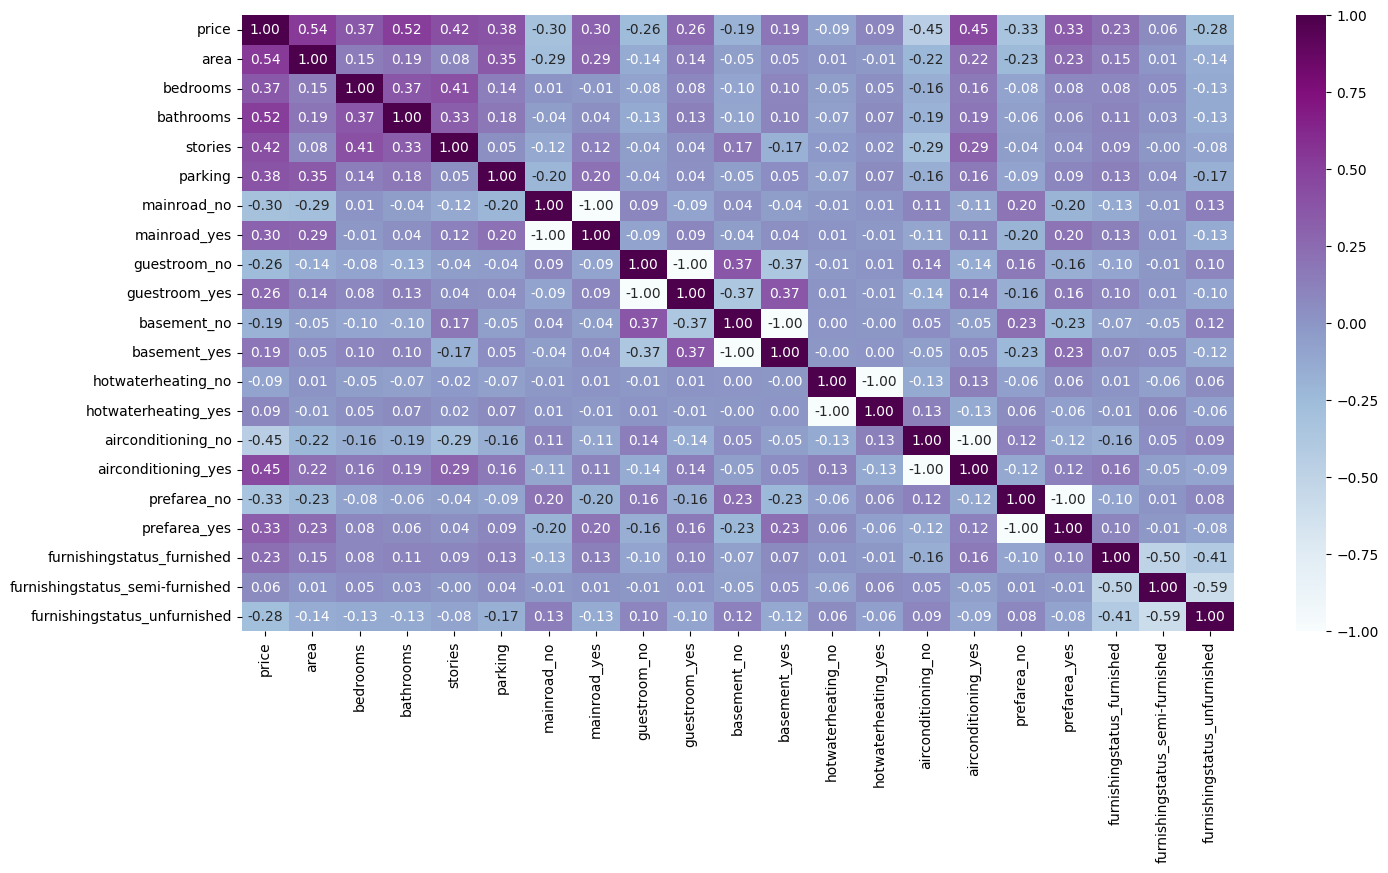

In [67]:
plt.figure(figsize=(16,8))
sns.heatmap(df_copy.corr(), cmap='BuPu', annot=True, fmt='.2f')

In [68]:
df[df.stories == 4]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished
17,8960000,8500,3,2,4,yes,no,no,no,yes,2,no,furnished
26,8463000,6000,3,2,4,yes,yes,yes,no,yes,0,yes,semi-furnished
30,8400000,7475,3,2,4,yes,no,no,no,yes,2,no,unfurnished
31,8400000,7000,3,1,4,yes,no,no,no,yes,2,no,semi-furnished
35,8080940,7000,3,2,4,yes,no,no,no,yes,2,no,furnished
37,7980000,9000,4,2,4,yes,no,no,no,yes,2,no,furnished
38,7962500,6000,3,1,4,yes,yes,no,no,yes,2,no,unfurnished


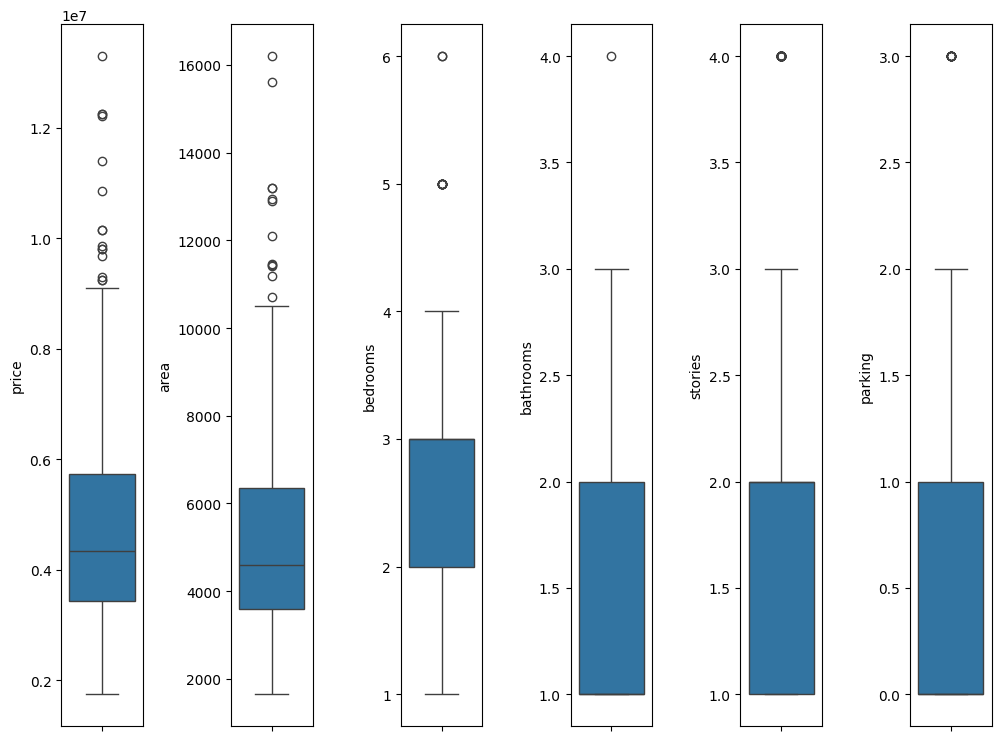

In [69]:
#check outliers

plt.figure(figsize=(22,8))

for i, value in enumerate(df.select_dtypes(include='number').columns.tolist()):
    plt.subplot(1, len(df.columns.tolist()), i + 1)
    sns.boxplot(df[value], orient='v')

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

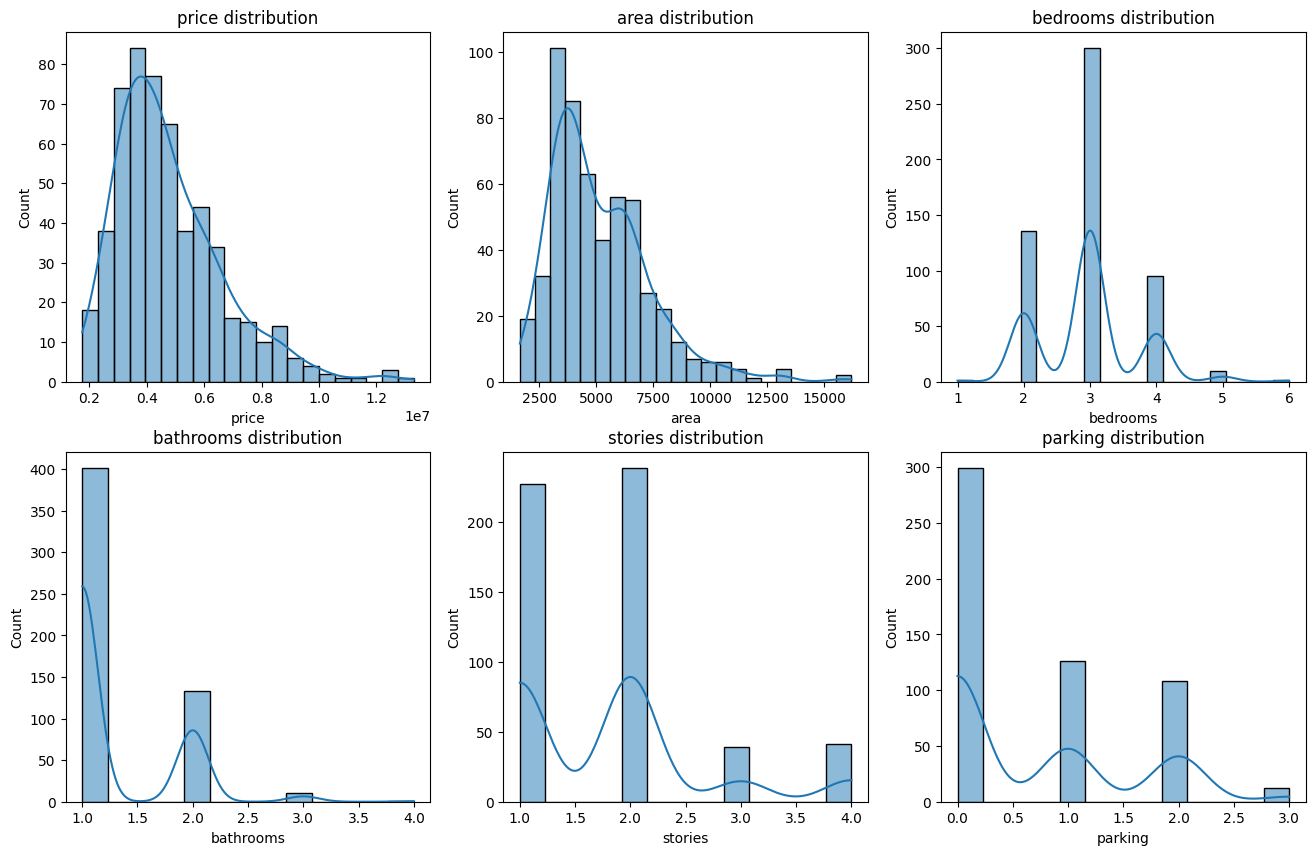

In [70]:
columns = df_copy.columns[:df_copy.columns.tolist().index('parking') + 1].to_list()
n_col = 3
n_rows = (len(columns) + n_col - 1) // n_col

plt.figure(figsize=(16,10))

for i, value in enumerate(df_copy.columns[:df_copy.columns.tolist().index('parking') + 1].tolist()):
    plt.subplot(n_rows, n_col, i + 1)
    sns.histplot(df_copy[value], kde=True)
    plt.title(f"{value} distribution")

In [71]:
#check skewness
df_copy[df_copy.columns[:df_copy.columns.tolist().index('parking') + 1]].skew()

price        1.212239
area         1.321188
bedrooms     0.495684
bathrooms    1.589264
stories      1.082088
parking      0.842062
dtype: float64

In [72]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = df_copy.drop(columns='price')
y = df_copy['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(max_depth=8, n_estimators=100)
rf_model = rf.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)       # Mean Absolute Error
mse = mean_squared_error(y_test, y_pred)        # Mean Squared Error
rmse = mse ** 0.5                                # Root Mean Squared Error (manually)
r2 = r2_score(y_test, y_pred)                   # R² score

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 1001544.07
MSE: 1899517830139.50
RMSE: 1378229.96
R² Score: 0.62


In [73]:
import pickle

with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf, file)

with open('random_forest_model.pkl', 'rb') as file:
    random_forest = pickle.load(file)

# Save Result
scores = {}

def print_save_score(loaded_model, model_name, log=False ):  # Default is False
    if log:

        y_log = np.log1p(y_train)

        # Predict in log scale
        y_train_pred_log = loaded_model.predict(X_train)
        y_test_pred_log = loaded_model.predict(X_test)

        # Transform back to original scale
        y_train_pred = np.expm1(y_train_pred_log)
        y_test_pred = np.expm1(y_test_pred_log)

        # Calculate R² manually using inverse-transformed predictions
        train_score = round(r2_score(y_log, y_train_pred_log) * 100, 2)
        test_score = round(r2_score(y_test, y_test_pred) * 100, 2)
    else:
        # Use built-in score method (model trained on original scale)
        train_score = round(loaded_model.score(X_train, y_train) * 100, 2)
        test_score = round(loaded_model.score(X_test, y_test) * 100, 2)

    print('train score :', str(train_score), '%')
    print('test score :', str(test_score), '%')

    scores[model_name] = {
        'train': train_score,
        'test': test_score
    }

print_save_score(random_forest, model_name='Random Forest')

train score : 91.77 %
test score : 62.42 %


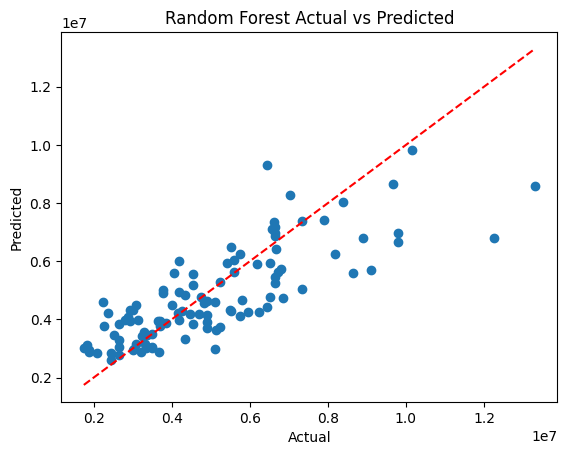

In [74]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

In [75]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb_model = xgb.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)       # Mean Absolute Error
mse = mean_squared_error(y_test, y_pred)        # Mean Squared Error
rmse = mse ** 0.5                                # Root Mean Squared Error (manually)
r2 = r2_score(y_test, y_pred)                   # R² score

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 1057455.00
MSE: 2068029243392.00
RMSE: 1438064.41
R² Score: 0.59


In [76]:
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)

with open('random_forest_model.pkl', 'rb') as file:
    xgb = pickle.load(file)

print_save_score(xgb, model_name='XGBRegressor')

train score : 99.75 %
test score : 59.09 %


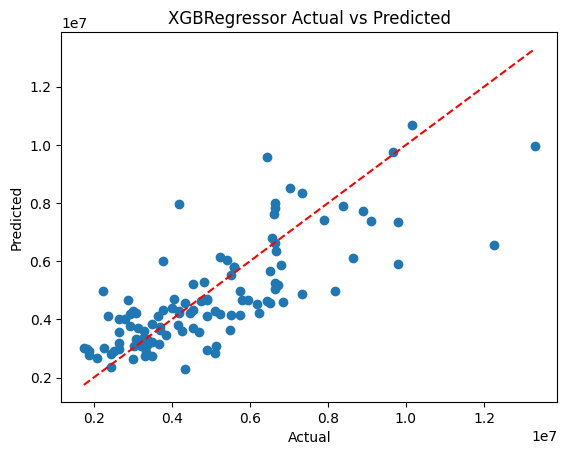

In [77]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('XGBRegressor Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

In [78]:
from sklearn.tree import DecisionTreeRegressor

dec_tree = DecisionTreeRegressor()
decTree_model = dec_tree.fit(X_train, y_train)

y_pred = decTree_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)       # Mean Absolute Error
mse = mean_squared_error(y_test, y_pred)        # Mean Squared Error
rmse = np.sqrt(mse)                             # Root Mean Squared Error (np)
r2 = r2_score(y_test, y_pred)                   # R² score

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 1239321.10
MSE: 3044242779816.51
RMSE: 1744775.85
R² Score: 0.40


In [79]:
with open('DecisionTreeModel.pkl', 'wb') as file:
    pickle.dump(decTree_model ,file)

with open('DecisionTreeModel.pkl', 'rb') as file:
    loaded_modelDecTree = pickle.load(file)

print_save_score(loaded_modelDecTree, model_name='Decisition Tree')

train score : 99.85 %
test score : 39.77 %


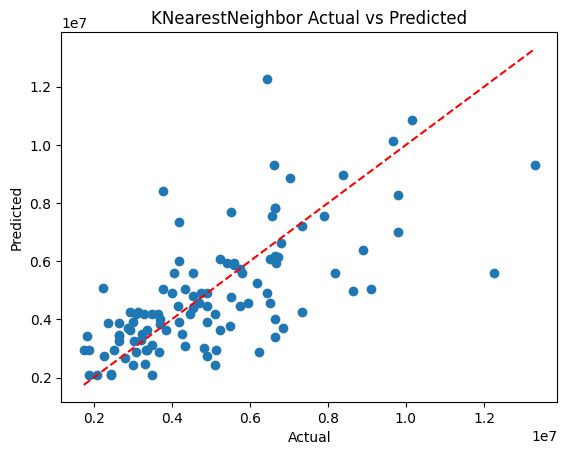

In [80]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('KNearestNeighbor Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

In [81]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 

knn = KNeighborsRegressor()
knn_model = knn.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)       # Mean Absolute Error
mse = mean_squared_error(y_test, y_pred)        # Mean Squared Error
rmse = mse ** 0.5                                # Root Mean Squared Error (manually)
r2 = r2_score(y_test, y_pred)                   # R² score

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 999612.84
MSE: 2117447914952.29
RMSE: 1455145.32
R² Score: 0.58


In [82]:
# Save model
with open('KNearestNeighbor.pkl', 'wb') as file:
    pickle.dump(knn_model, file)

    # Load model
with open('KNearestNeighbor.pkl', 'rb') as file:
    loaded_modelKNN = pickle.load(file)

print_save_score(loaded_modelKNN, model_name="KNearestNeighbor")

train score : 72.41 %
test score : 58.11 %


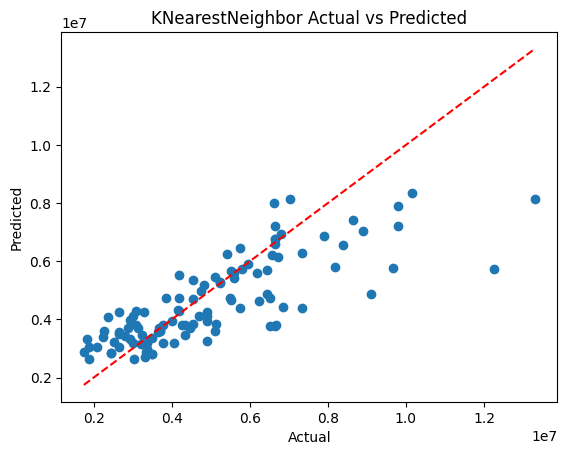

In [83]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('KNearestNeighbor Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

In [84]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
MultipleRegModel = reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)       # Mean Absolute Error
mse = mean_squared_error(y_test, y_pred)        # Mean Squared Error
rmse = mse ** 0.5                                # Root Mean Squared Error (manually)
r2 = r2_score(y_test, y_pred)                   # R² score

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 970043.40
MSE: 1754318687330.67
RMSE: 1324506.96
R² Score: 0.65


In [85]:
# Save model
with open('MultiRegModel.pkl', 'wb') as file:
    pickle.dump(MultipleRegModel, file)

# Load model
with open('MultiRegModel.pkl', 'rb') as file:
    loaded_modelMultiReg = pickle.load(file)

print_save_score(loaded_modelMultiReg, model_name="Multiple Regression")

train score : 68.59 %
test score : 65.29 %


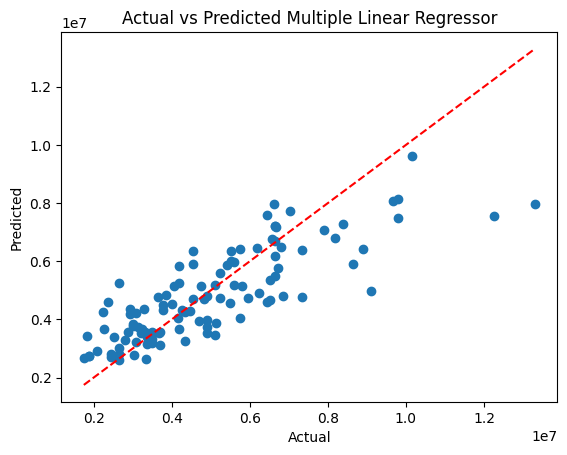

In [86]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Multiple Linear Regressor')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

In [87]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=1.0)
ridge_model = ridge.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)       # Mean Absolute Error
mse = mean_squared_error(y_test, y_pred)        # Mean Squared Error
rmse = mse ** 0.5                                # Root Mean Squared Error (manually)
r2 = r2_score(y_test, y_pred)                   # R² score

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 969842.59
MSE: 1754702295795.98
RMSE: 1324651.76
R² Score: 0.65


In [88]:
with open('RidgeModel.pkl', 'wb') as file:
    pickle.dump(ridge_model, file)

with open('RidgeModel.pkl', 'rb') as file:
    loaded_modelRidge = pickle.load(file)

print_save_score(loaded_modelRidge, model_name="Ridge")

train score : 68.59 %
test score : 65.28 %


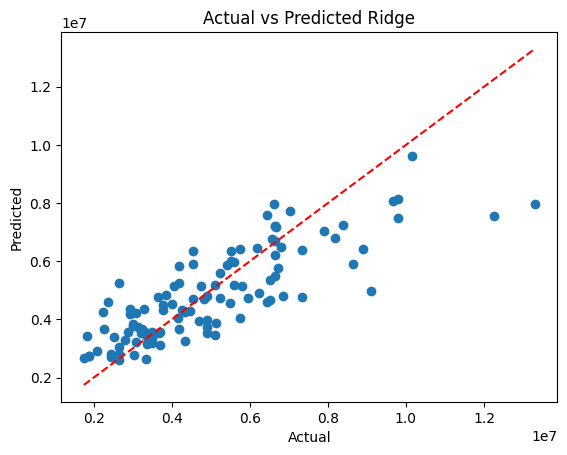

In [89]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Ridge')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

In [90]:
lasso = Lasso(alpha=1.0)
lasso_model = lasso.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 970043.90
MSE: 1754320636096.25
RMSE: 1324507.70
R² Score: 0.65


In [91]:
with open('LassoModel.pkl', 'wb') as file:
    pickle.dump(lasso_model, file)

with open('LassoModel.pkl', 'rb') as file:
    loaded_modelLasso = pickle.load(file)

print_save_score(loaded_modelLasso, model_name="Lasso")

train score : 68.59 %
test score : 65.29 %


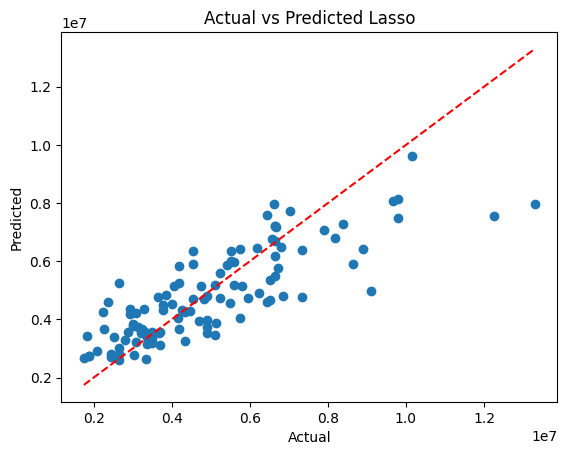

In [92]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Lasso')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

In [93]:
print("Each Model Result\n")
for model, score_dict in scores.items():
    train = score_dict['train']
    test = score_dict['test']
    print(f"{model}\nTrain Score = {train}%\nTest Score = {test}%\n")

Each Model Result

Random Forest
Train Score = 91.77%
Test Score = 62.42%

XGBRegressor
Train Score = 99.75%
Test Score = 59.09%

Decisition Tree
Train Score = 99.85%
Test Score = 39.77%

KNearestNeighbor
Train Score = 72.41%
Test Score = 58.11%

Multiple Regression
Train Score = 68.59%
Test Score = 65.29%

Ridge
Train Score = 68.59%
Test Score = 65.28%

Lasso
Train Score = 68.59%
Test Score = 65.29%

